<a href="https://colab.research.google.com/github/nayana142/Neural-Style-Transfer/blob/main/Neural_Style_Transfer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Style Transfer Using Pretrained Models

* Neural Style Transfer (NST) is an exciting and creative application of deep learning that allows you to transform images by combining the content of one image with the artistic style of another.
* Imagine taking a photograph and reimagining it in the style of a famous painting — that’s the magic of NST. By leveraging pre-trained convolutional neural networks (CNNs), NST extracts content and style features separately, blending them to generate a completely new image.
* This technique has opened up new possibilities in digital art, design, and image processing, making it a popular topic in the fields of computer vision and generative AI.

* The approach demonstrated the power of deep learning in creative applications, delivering visually stunning outputs with optimized performance

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from matplotlib import gridspec
from IPython import display

* PIL/Pillow is used for image handling (loading, processing).
* TensorFlow Hub is used for loading and using pre-trained models.
* Matplotlib with gridspec is used for advanced plotting and visual layouts.
* IPython's display is used for inline display in Jupyter environments


In [5]:
style_img = r"/content/content.jpg"
content_img = r"/content/stylist.jpg"

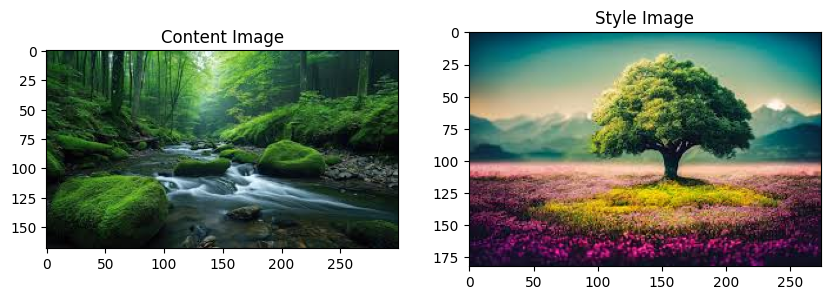

In [6]:
content = Image.open(content_img)
style = Image.open(style_img)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(content)
plt.title("Content Image")
plt.subplot(1,2,2)
plt.imshow(style)
plt.title("Style Image")
plt.show()

In [7]:
print(np.array(content).shape)
print(np.array(style).shape)

(168, 300, 3)
(183, 275, 3)


In [8]:
# transformation fucnction for style image
def image_to_tensor_style(path_to_image):
    img = tf.io.read_file(path_to_image)
    img = tf.image.decode_image(img,channels=3,dtype=tf.float32)
    img = tf.image.resize(img,[256,256])
    img = img[tf.newaxis,:]
    return img


def image_to_tensor_target(path_to_image,image_size):
    img = tf.io.read_file(path_to_image)
    img = tf.image.decode_image(img,channels=3,dtype=tf.float32)
    img = tf.image.resize(img,[image_size,image_size],preserve_aspect_ratio=True)
    img = img[tf.newaxis,:]
    return img

* image_to_tensor_style is likely designed for a style image in tasks like neural style transfer, where fixed input sizes are commonly required.
* image_to_tensor_target is likely used for a target image where the size can vary depending on the input.
* tf.newaxis: Adds a new dimension, effectively creating a batch size of 1.

In [20]:
output_image_size  =400
style_image = image_to_tensor_style(style_img)
target_image = image_to_tensor_target(content_img,output_image_size)


In [14]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [21]:
outputs = hub_module(tf.constant(target_image),tf.constant(style_image))
stylized_image = outputs[0]
stylized_image.shape

TensorShape([1, 224, 400, 3])

 * convert the target_image and style_image into TensorFlow tensors format using tf.constant()
 * outputs[0] extracts the stylized image tensor from the collection.the stylized image is typically the first element in the output


*   Where content_image, style_image, and stylized_image are expected to be 4-D Tensors with shapes [batch_size, image_height, image_width, 3]
* batch_size is typically 1 when working with single images in inference mode



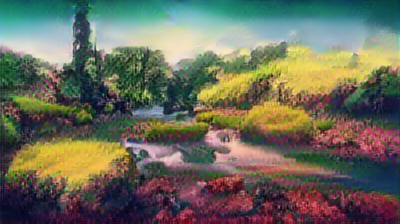

In [22]:
tensor = stylized_image * 256
tensor = np.array(tensor,dtype=np.uint8)
tensor = tensor[0]
Image.fromarray(tensor)

* In most style transfer models, the pixel values of an image are usually normalized to a range between 0 and 1
* By multiplying the tensor by 256, you are essentially reversing the normalization and scaling the pixel values back into the range [0, 256].
* Converts the tensor to a NumPy array with dtype=np.uint8(8-bit unsigned integer format), which is the typical format for images, where each pixel is represented as an integer between 0 and 255.
* This conversion is needed because Pillow (PIL), which handles image operations, works with NumPy arrays in this format.
* Remove Batch Dimension :if the shape of tensor was (1, 256, 256, 3), after tensor[0], it will have the shape (256, 256, 3).
* The Image.fromarray() function from the Pillow (PIL) library converts a NumPy array to a PIL Image.

In [17]:
def stye_transfer_function(content_image,style_image):

    content = Image.open(content_img)
    style = Image.open(style_img)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(content)
    plt.title("Content Image")
    plt.subplot(1,2,2)
    plt.imshow(style)
    plt.title("Style Image")
    plt.show()

    print('------------------------------------------------------------------------------------------------------------------------------')

    output_image_size  =400
    target_image = image_to_tensor_target(content_img,output_image_size)
    style_image = image_to_tensor_style(style_img)

    # hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


    outputs = hub_module(tf.constant(target_image),tf.constant(style_image))
    stylized_image = outputs[0]


    tensor = stylized_image * 256
    tensor = np.array(tensor,dtype=np.uint8)
    tensor = tensor[0]
    image = Image.fromarray(tensor)

    plt.figure(figsize=(6,6))
    plt.imshow(image)
    plt.title("======= Stylized Image ========")
    plt.show()

    return

In [ ]:
style_img = r"/content/content.jpg"
content_img = r"/content/stylist.jpg"

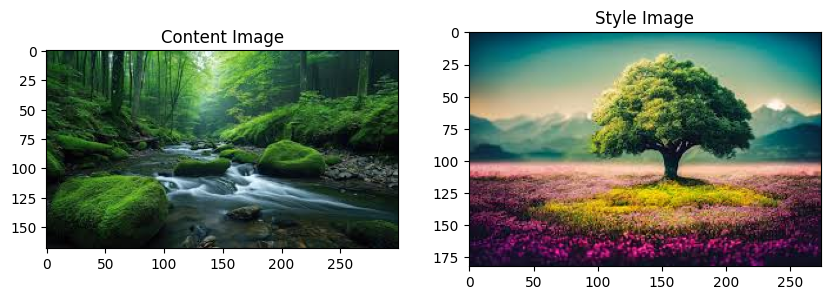

------------------------------------------------------------------------------------------------------------------------------


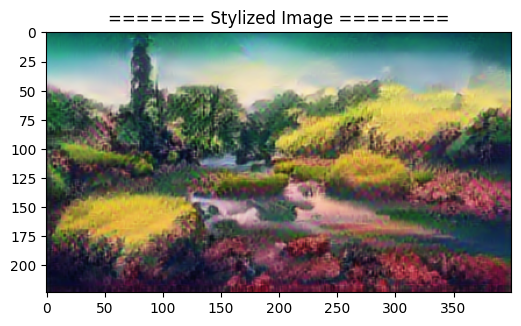

In [19]:
stye_transfer_function(content_img,style_img)